# Problem Set 1, Amol Surve


In [106]:
#IPython is what you are using now to run the notebook
import IPython
#print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__);

# Numpy is a library for working with Arrays
import numpy as np
#print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
#print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
#print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
#print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
#print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [51]:
flights= pd.read_csv('flights.csv')
flights_df=flights
flights_df.head(3)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0


In [52]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [56]:
# Number of flights 3923 
#flights_df.origin.unique()
result=flights_df[flights_df['dest']=='SEA']
result.shape[0]

3923

There were total 3923 flights from NYC airports to Seattle in 2013.

(b) How many airlines fly from NYC to Seattle?

In [25]:
#Selecting distinct airlines from the previous result
resCarrier=result[['carrier']]
resCarrier
airlines=resCarrier.drop_duplicates()
airlines

,carrier
78,AS
93,DL
165,UA
404,B6
656,AA


 As you can see, there were total 5 airlines flying from NYC to Seattle 

(c) How many unique air planes fly from NYC to Seattle?

In [62]:
#Selecting distinct airplanes using group by clause
flights= pd.read_csv('flights.csv')
result=flights
result=result[result['dest']=='SEA'].groupby(result['tailnum'])
len(result)

935

There were total 935 unique aircrafts flying from NYC to Seattle

(d) What is the average arrival delay for flights from NC to Seattle?

In [77]:
flights= pd.read_csv('flights.csv')
result=flights
result=result[result['dest']=='SEA']
arrivalDelay=result.arr_delay.mean()
#Summing all the values of arrival delay for flights
arrivalDelay

-1.0990990990990992

The average arrival delay for flights from NYC to Seattle is -1.099 minutes and negative arrival delay implies flights arriving earlier than the expected arrival time.

(e) What proportion of flights to Seattle come from each NYC airport?

In [66]:
#To find out exactly which airports from NYC have flights to Seattle 
airports=result[['origin']]
airports
nycairports=airports.drop_duplicates()
nycairports

,origin
78,EWR
93,JFK


Since, we know that only two airports from NYC have flights to Seattle, we are filtering them and dividing it with the total count from both the airports to get the proportion of flights.

In [68]:
count=result.shape[0]
jfk=result[result['origin']=='JFK'].shape[0]
ewr=result[result['origin']=='EWR'].shape[0]
jfkProportion=jfk/count
ewrProportion=ewr/count
print("Proportion of flights to Seattle from JFK is ",jfkProportion)
print("Proportion of flights to Seattle from EWR is ",ewrProportion)

Proportion of flights to Seattle from JFK is  0.5332653581442773
Proportion of flights to Seattle from EWR is  0.46673464185572267


As you can see the result, the proportion of flights from JFK is 0.533 whereas from EWR is 0.467

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

Method 1 is looping through every month, and then for each month, further looping through every day using the list of days created based on the month number. The Average arrival delay is calculated for that day and compared with the maximum in order to store the maximum average arrival delay observed while looping through every date inn the dataframe.

In [436]:
#Method 1 to get the day where maximum average arrival delay was observed
#In this method, I am looping through every month, and for each month, further looping through every day using the list of days created based on the month number
df=pd.read_csv('flights.csv')
months=df[['month']].drop_duplicates()
dfMonth=months['month']
count=0;
maximum=0
#looping through the months
for i in dfMonth:
    #print("Following is the daily average departure delay for month",i)
    days=df[df['month']==i]
    monthDays=days[['day']].drop_duplicates()
    #creating the list of days based on the month number
    daysList=monthDays['day'].tolist()
    #looping through the days
    for j in daysList:
        mean=days[days['day']==j].mean()
        positiveDelays=mean['arr_delay']
        #finding the maximum value for delay
        if(positiveDelays>maximum):
            maximum=positiveDelays
            day=j
            month=i
        #print("Mean Departure Delay for day", j,"is",mean['arr_delay'])
        count=count+1
print("Maximum arrival delay is",maximum,"on day",day,"of month",month)       

maximum arrival delay is 85.8621553885 on day 8 of month 3


Maximum Arrival Delay of 85.86 minutes was on March 8th 2013

MEthod 1 is looping through every month, and then for each month, further looping through every day using the list of days created based on the month number. The Average departure delay is calculated for that day and compared with the maximum in order to store the maximum average departure delay observed while looping through every date inn the dataframe.

In [437]:
#Method 1 to get the day where maximum average departure delay was observed
df=pd.read_csv('flights.csv')
months=df[['month']].drop_duplicates()
dfMonth=months['month']
count=0;
maximum=0
#looping through the months
for i in dfMonth:
    #print("Following is the daily average departure delay for month",i)
    days=df[df['month']==i]
    monthDays=days[['day']].drop_duplicates()
    #creating the list of days based on the month number
    daysList=monthDays['day'].tolist()
    for j in daysList:
        mean=days[days['day']==j].mean()
        positiveDelays=mean['dep_delay']
        #finding the maximum value for delay
        if(positiveDelays>maximum):
            maximum=positiveDelays
            day=j
            month=i
        #print("Mean Departure Delay for day", j,"is",mean['arr_delay'])
        count=count+1
print("Maximum departure delay is",maximum,"on day",day,"of month",month)

maximum departure delay is 83.5369211514 on day 8 of month 3


Maximum Departure Delay of 83.54 was on March 8th 2013

Method 2 simply uses the group by clause in order to display the date where the average arrival and departure delays are maximum. New colun called Period is created by concatenating the year, month and day to indicate the date and grouping is further performed on that.

In [438]:
#Method 2 to get the days where maximum average arrival and average departure delays are observed
df=pd.read_csv('flights.csv')
#creating a new column called period to store the date
df['period'] = df['year'].astype(str) +"/"+ df['month'].astype(str)+"/"+df['day'].astype(str)
df1=df[['period','arr_delay','dep_delay']]
#grouped by the date to get the average value for each day
grouped = df1.groupby(['period']).mean()
#finding the maximum values
c=grouped.arr_delay.max()
d=grouped.dep_delay.max()
grouped1=grouped[grouped['arr_delay']==c]
grouped1
grouped2=grouped[grouped['dep_delay']==d]
grouped2

,arr_delay,dep_delay
period,,
2013/3/8,85.862155,83.536921


As you can see, the maximum arrival and departure delay was on the same day i.e. March 8th 2013

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


To answer this question, I have used two approaches:


Method 1 considers number of positive departure delays per day in order to get the count of flights delayed departing the airport. It will give us the day when the maximum flights were delayed. It can be considered as the worst day to fly out of NYC since maximum number of flights departing from NYC got delayed.

In [107]:
#Method 1
#Number of flights delayed per day based on count of positive departure delays
df=pd.read_csv('flights.csv')
months=df[['month']].drop_duplicates()
dfMonth=months['month']
maximum=0
for i in dfMonth:
    #print("For month",i)
    df1=df[df['month']==i]
    monthDays=df1[['day']].drop_duplicates()
    daysList=monthDays['day'].tolist()
    for j in daysList:
        df2=df1[df1['day']==j]
        df2=df2[df2['dep_delay']>0]
        positiveDelays=df2.shape[0]
        if(positiveDelays>maximum):
            maximum=positiveDelays
            day=j
            month=i
        #print("Number of flights delayed on day",j,"are",positiveDelays)

print("Maximum delayed flights based on number of positive depature delays per day were",maximum,"on day",day,"of month",month)        

Maximum delayed flights based on number of positive depature delays per day were 674 on day 23 of month 12


December 23rd 2013 can be considered as the worst day to fly out of NYC since maximum number of flights got delayed.

Method 2 considers average arrival and departure delays per day and the worst day comes the same for both which is MArch 8th 2013 to fly out of NYC

In [533]:
#Method 2
#Method 2 to get the days where maximum average arrival and average departure delays are observed
df=pd.read_csv('flights.csv')
df['period'] = df['year'].astype(str) +"/"+ df['month'].astype(str)+"/"+df['day'].astype(str)
df1=df[['period','arr_delay','dep_delay']]
grouped = df1.groupby(['period']).mean()
c=grouped.arr_delay.max()
d=grouped.dep_delay.max()
grouped1=grouped[grouped['arr_delay']==c]
grouped1
grouped2=grouped[grouped['dep_delay']==d]
grouped2

,arr_delay,dep_delay
period,,
2013/3/8,85.862155,83.536921


(c) Are there any seasonal patterns in departure delays for flights from NYC?

In order to analyze the seasonal patterns, I am looping through every month and counting the flights with positive departure delay in order to see which month has the maximum flights with positive departure delays.

In [451]:
#Method 1
#To analyze the seasonal patterns, number of flights with positive departure delays per month are considered
#based on count of positive departure delays
df=pd.read_csv('flights.csv')
months=df[['month']].drop_duplicates()
dfMonth=months['month']
monthMax=0
for i in dfMonth:
    #print("For month",i)
    df1=df[df['month']==i]
    df1=df1[df1['dep_delay']>0]
    if(df1.shape[0]>monthMax):
        monthMax=df1.shape[0]
        month=i
    print("For month",i,"Number of positive departure delays were",df1.shape[0])


For month 1 Number of positive departure delays were 9662
For month 10 Number of positive departure delays were 8722
For month 11 Number of positive departure delays were 8239
For month 12 Number of positive departure delays were 13550
For month 2 Number of positive departure delays were 9124
For month 3 Number of positive departure delays were 11209
For month 4 Number of positive departure delays were 10543
For month 5 Number of positive departure delays were 11291
For month 6 Number of positive departure delays were 12655
For month 7 Number of positive departure delays were 13909
For month 8 Number of positive departure delays were 11713
For month 9 Number of positive departure delays were 7815


July 2013 has the maximum number of flights getting delayed.

Method 2 simply considers the mean departure delay for every month to see which month has the maximum average departure delay. I am again looping through months and considering mean for every month value.

In [108]:
#Method 2
#Finding average departure delays for every month 
df=pd.read_csv('flights.csv')
months=df[['month']].drop_duplicates()
dfMonth=months['month']
count=0
maximum=0
for i in dfMonth:
    #print("Following is the daily average departure delay for month",i)
    df1=df[df['month']==i]
    meanDelay=df1.dep_delay.mean()
    print("Delay for month",i,"is",meanDelay)

Delay for month 1 is 10.036665030396858
Delay for month 10 is 6.243988413080655
Delay for month 11 is 5.43536156833734
Delay for month 12 is 16.576687569162672
Delay for month 2 is 10.816842549598986
Delay for month 3 is 13.227076109105209
Delay for month 4 is 13.938037741305763
Delay for month 5 is 12.986859348988771
Delay for month 6 is 20.846331791143424
Delay for month 7 is 21.727786554326837
Delay for month 8 is 12.611039839117922
Delay for month 9 is 6.7224762185679525


July 2013 has the maximum average departure delay

It is a variation in method 2 to get the average departure delay based on group by clause applied on month parameter and then taking it's average

In [78]:
#Variation in method 2 to get average departure delay per month using group by
df=pd.read_csv('flights.csv')
df1 = df[['month','dep_delay']]
df1.groupby("month").mean()

,dep_delay
month,
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476


July 2013 has the maximum average departure delay

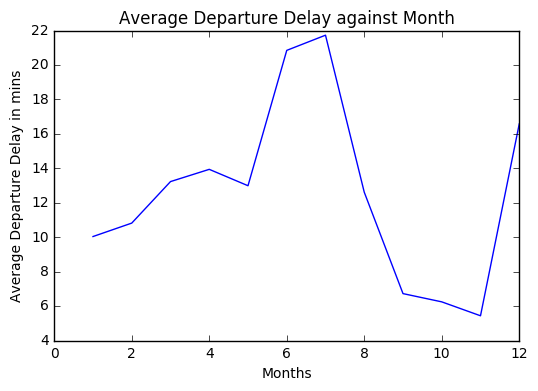

In [128]:
#Creating a plot for Average Departure Delay vs Months
df=pd.read_csv('flights.csv')
plt.plot(df.groupby('month')['dep_delay'].mean())
plt.xlabel('Months')
plt.ylabel('Average Departure Delay in mins')
plt.title('Average Departure Delay against Month')
plt.show()

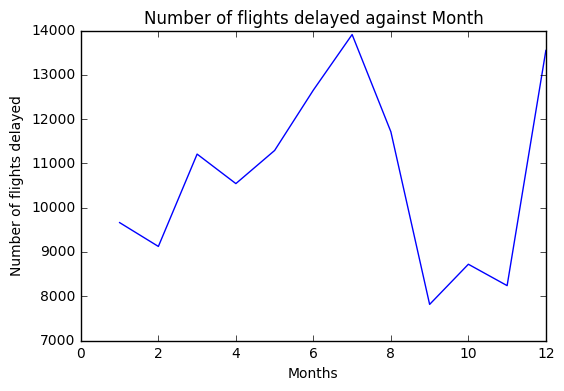

In [129]:
#Creating a plot for Number of flights delayed based on positive departure delays vs Months
df=pd.read_csv('flights.csv')
dayDelay=df[df['dep_delay']>0]
plt.plot(dayDelay.groupby('month')['dep_delay'].count())
plt.xlabel('Months')
plt.ylabel('Number of flights delayed')
plt.title('Number of flights delayed against Month')
plt.show()

Based on the results, we can see large number of flights getting delayed in the months of April to July and December. The average departure delay is also large in these months which clearly indicated the peak season when passengers travel that might cause the flights to get delayed. 

(d) On average, how do departure delays vary over the course of a day?

In order to solve this question, I have used to methods, where Method 1 considers the average departure delay grouped based on hourly values to see how the delay is getting affected over the course of a day. Methid 2 considers the number of delayed flights based on the count of the positive departure values, to know how the number of flights getting delayed gets affected over the course of a day on hourly basis.

In [92]:
#Using group by clause to find the average delay by hour
df=pd.read_csv('flights.csv')
df1 = df[['hour','dep_delay']]
df1.groupby("hour").mean()

,dep_delay
hour,
0.0,128.642452
1.0,207.049327
2.0,239.921875
3.0,304.727273
4.0,-5.554098
5.0,-4.355644
6.0,-1.520552
7.0,0.223289
8.0,1.091432


As you can see in the above dataframe, there are 25 values of hours. We need to combine the value of hour 0 and hour 24. We are taking the mean of two values and adding it as the new row in the dataframe along with discarding the rows with hour values 0 and 24.

In [119]:
#Method 1 - Mean of the departure delay with grouping based on hour
# Subsetting the dataframe
x = pd.DataFrame(df[["hour","dep_delay"]].groupby("hour").mean()).reset_index()
#Considering the values for hour 24 and zerp
y = x[(x["hour"] == 24) | (x["hour"] == 0)]
#Taking average
mean_24 = y.dep_delay.mean()
#discarding rows with value 0 and 24 hour
x2 = x[(x["hour"] != 24) & (x["hour"] != 0)]
#Adding new row with hour value 0 and dep_delay as mean_24
newData=x2.append(pd.Series([mean_24,24], index = ["dep_delay", "hour"]), ignore_index=True).sort_values("dep_delay",ascending= False) 
#Displaying the dataframe           
newData

,hour,dep_delay
2,3.0,304.727273
1,2.0,239.921875
0,1.0,207.049327
22,23.0,96.946865
23,24.0,96.752260
21,22.0,68.190042
20,21.0,42.064964
19,20.0,28.266213
18,19.0,21.497342
17,18.0,18.664671


In [122]:
#Method 2 - Count of flights with positive departure delay with grouping based on hour
dayDelay=df[df['dep_delay']>0]

#Counting of the flights and grouping based on hour
count = pd.DataFrame(dayDelay[["hour","dep_delay"]].groupby("hour").count()).reset_index()

#Combining the hours '0' and '24'
combine = count[(count["hour"] == 24) | (count["hour"] == 0)]
mean24 = combine.dep_delay.count()
newData = count[(count["hour"] != 24) & (count["hour"] != 0)]

#Appending the values and sorting them
finalData=newData.append(pd.Series([mean24,24], index = ["dep_delay", "hour"]), ignore_index=True).sort_values("dep_delay", 
                                                                                                 ascending= False)
#print
finalData

,hour,dep_delay
15,17.0,11558
14,16.0,10653
17,19.0,10595
13,15.0,10568
16,18.0,10413
18,20.0,9077
12,14.0,7555
19,21.0,7444
11,13.0,7061
6,8.0,6190


Method 1 Result:

The average departure delay for the flights seems to be increasing as the night approaches since there are large values of the average departure delay for late hours.

Method 2 Result:

Method 2 shows not too many flights got delayed in the late hours but when they do get delayed, the average delay shows a larger value indicating they got delayed for longer period of time.

## Question 3
Which flight departing NYC in 2013 flew the fastest?

I have created the new column called speed where I am dividing the columns distance by column air_time to get the speed of the flight and np.max() provides the flight with maximum speed value.

In [13]:
# Your code here
df=pd.read_csv('flights.csv')
df["speed"] = df.distance/df.air_time
df[df["speed"] == np.max(df.speed)][["tailnum", "carrier", "flight"]]

,tailnum,carrier,flight
216447,N666DN,DL,1499


The fastest flight is flight operated under carrier DL with tailnumber N666DN and flight number 1499.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

I have grouped the dataframe based on three columns - Carrier, flight and destination to get the unique flight detailes every day. Also, created the new column called daysFlown to store the count of days every flight is flying to it's destination. In the end, checking daysFlown column value with 365 gives you the number of flights flying every day to it's destination.

In [117]:
# Your code here
df=pd.read_csv('flights.csv')
df5 = pd.DataFrame(df.groupby(["carrier", "flight", "dest"]).size(), columns = ["daysFlown"]).reset_index()

df5[df5["daysFlown"] == 365]

,carrier,flight,dest,daysFlown
767,AA,59,SFO,365
775,AA,119,LAX,365
783,AA,181,LAX,365
904,AA,1357,SJU,365
914,AA,1611,MIA,365
1118,B6,219,CLT,365
1147,B6,359,BUR,365
1150,B6,371,FLL,365
1169,B6,431,SRQ,365
1243,B6,703,SJU,365


As you can see in the above table, the flights flying to San Francisco, Los Angeles, San Juan, Miami, Charlotte, Burbank, Fort Lauderdale, Sarasota, Orlando, Tampa, Dulles, Honolulu happen every day. 

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


Research Question:
Find how carriers are affected by delays?

Why?:
Analyzing the effect of average delay values with respect to the airline carriers would provide valuable insight to the passengers so that they can choose the carriers accordingly based on their efficiency in terms of reduced delays.

How?
In order to plot the carriers vs delays, I created three cases - 
case 1: Total Delay as the sum of Departure and Arrival Delay
case 2: Average Arrival Delay
case 3: Average Departure Delay; 
And plotted the carriers vs these factors by grouping based on the carriers and taking the average of the departure delays. For better understanding, I have sorted the bar values in descending order.





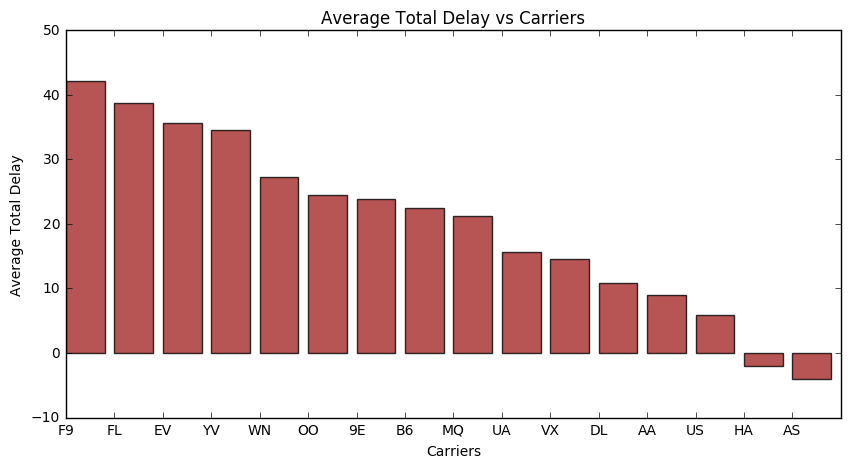

In [105]:
#Group by based on carriers and mean for the total delay to see the effect of total delay per carrier
df1=pd.read_csv('flights.csv')
df1["Total Delay"] = df.dep_delay+df.arr_delay
carrierByDelay = pd.DataFrame(df1.groupby('carrier').mean().sort_values("Total Delay", ascending = False)).reset_index()
plt.figure(figsize=[10,5])
plt.bar(range(carrierByDelay.shape[0]), carrierByDelay["Total Delay"], alpha = 0.8, color = "brown")
plt.xticks(range(carrierByDelay.shape[0]), carrierByDelay.carrier)
plt.ylabel("Average Total Delay")
plt.xlabel("Carriers")
plt.title("Average Total Delay vs Carriers")
plt.show()

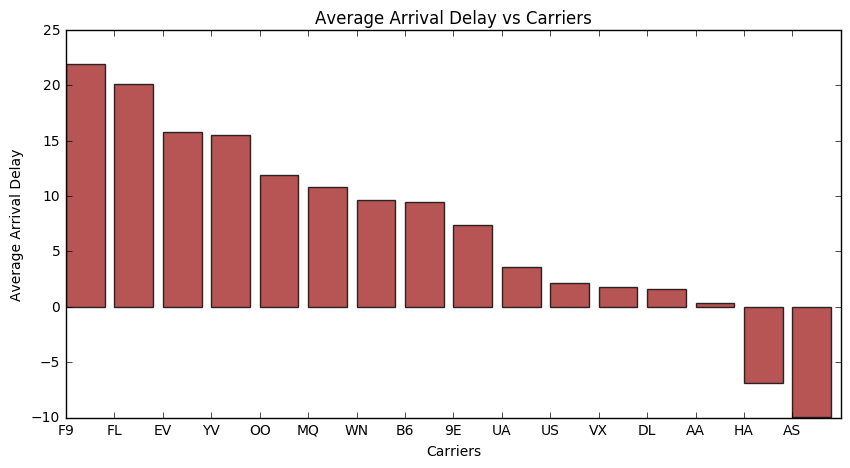

In [104]:
#Group by based on carriers and mean for the arrival delay to see the effect of arrival delay per carrier
df1=pd.read_csv('flights.csv')
carrierByDelay = pd.DataFrame(df1.groupby('carrier').mean().sort_values("arr_delay", ascending = False)).reset_index()
plt.figure(figsize=[10,5])
plt.bar(range(carrierByDelay.shape[0]), carrierByDelay["arr_delay"], alpha = 0.8, color = "brown")
plt.xticks(range(carrierByDelay.shape[0]), carrierByDelay.carrier)
plt.ylabel("Average Arrival Delay")
plt.xlabel("Carriers")
plt.title("Average Arrival Delay vs Carriers")
plt.show()

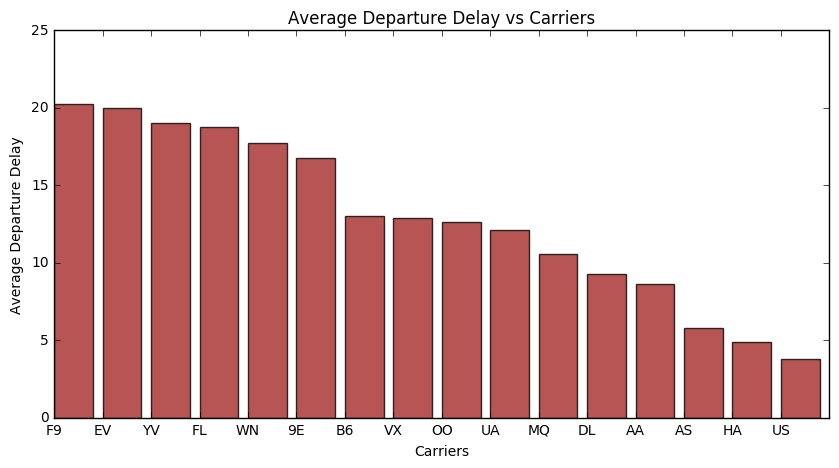

In [103]:
#Group by based on carriers and mean for the departure delay to see the effect of departure delay per carrier
df1=pd.read_csv('flights.csv')
carrierByDelay = pd.DataFrame(df1.groupby('carrier').mean().sort_values("dep_delay", ascending = False)).reset_index()
plt.figure(figsize=[10,5])
plt.bar(range(carrierByDelay.shape[0]), carrierByDelay["dep_delay"], alpha = 0.8, color = "brown")
plt.xticks(range(carrierByDelay.shape[0]), carrierByDelay.carrier)
plt.ylabel("Average Departure Delay")
plt.xlabel("Carriers")
plt.title("Average Departure Delay vs Carriers")
plt.show()

In order to analyze this question, new column called total delay is created which is sum of arrival and departure delay which is plotted against the carriers. Similarly, effect of individual delays - arrival and departure delays is also plotted against the carriers. F9 is the carrier with the maximum average delay as you can see below in all three cases. Interestingy, carriers F9, FL, EV and YV are there in top four places for all three cases, showing the least effieicnt airlines based on the average delay values for passengers.

    

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [47]:
#Merging two datasets based on year, month, day and origin values
df1=pd.read_csv('flights.csv')
df2=pd.read_csv('weather.csv')
#Merging based on year, month, day and origin
merged=pd.merge(flight,weather,on = ['year','month','day','origin'], how = 'inner')
#Checking whether the datasets are merged 
merged.head(5)

,Unnamed: 0_x,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,hour_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,...,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,...,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,...,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,...,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,...,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In order to observe the effect of natural factors on the departure delay of flights, I have merged two datasets - flights and weather based on column values - year, month, day and origin and then plotted the effect of individual factor on the average departure delay.

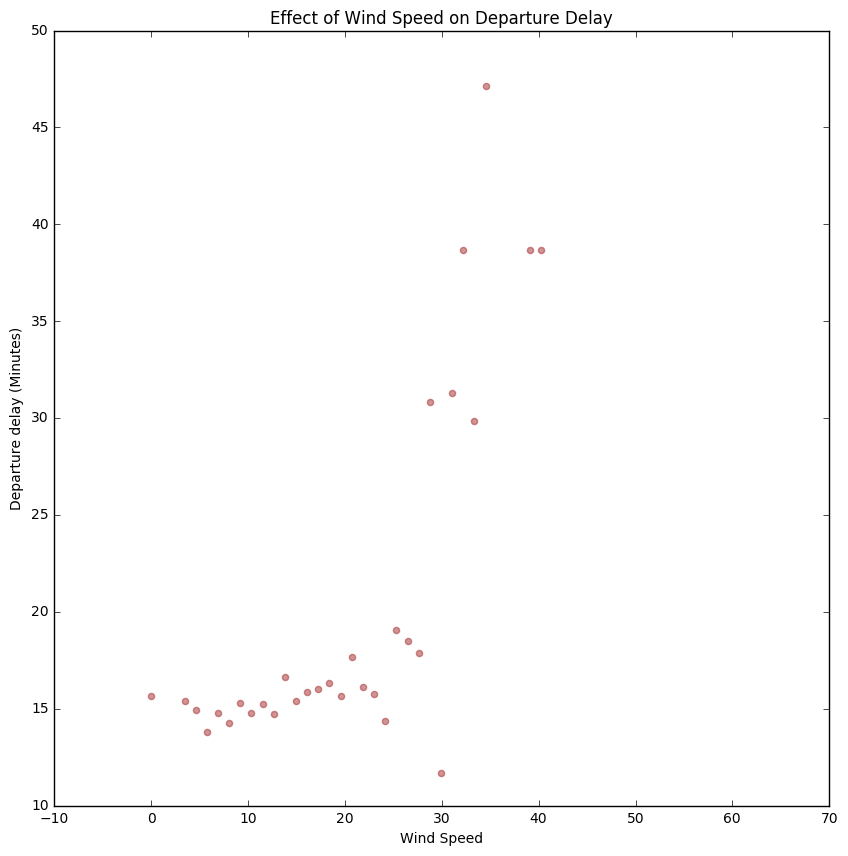

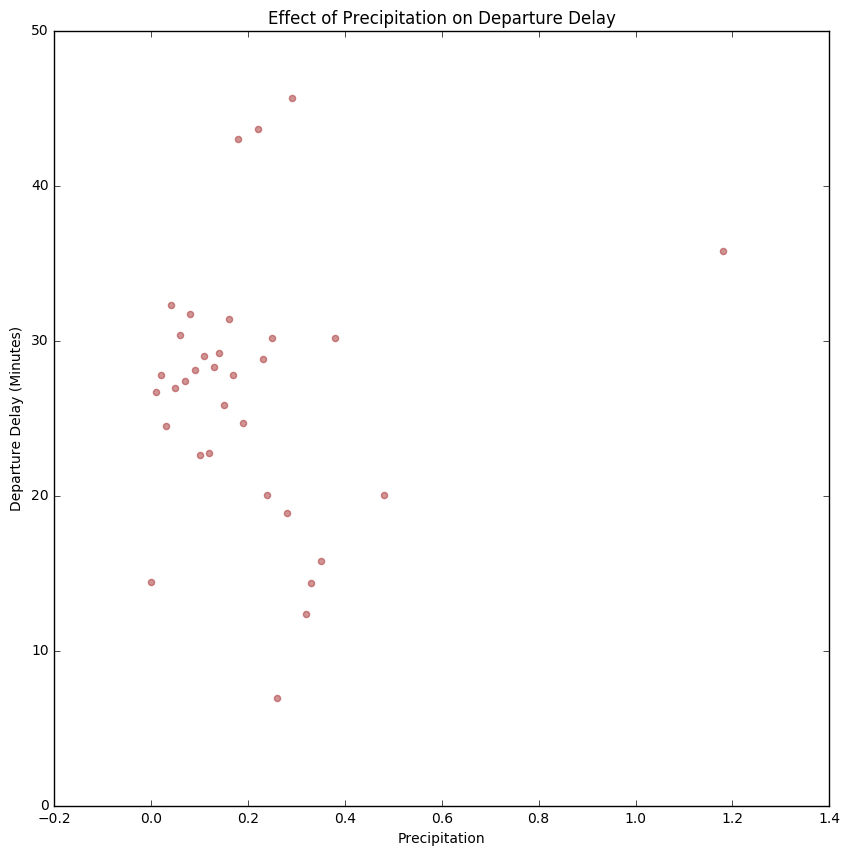

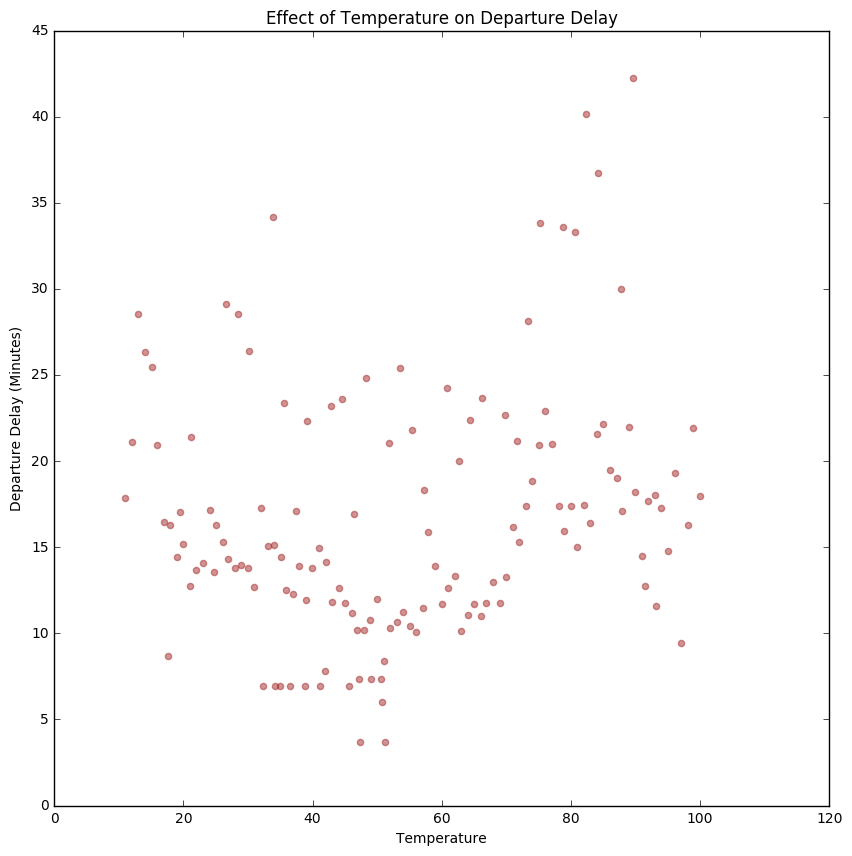

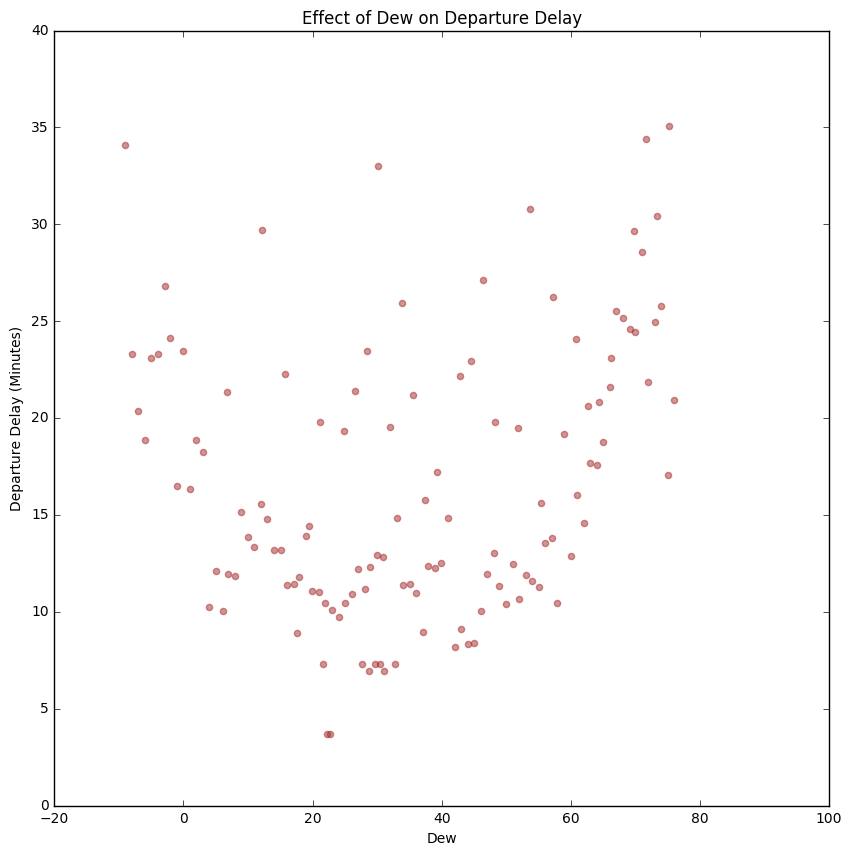

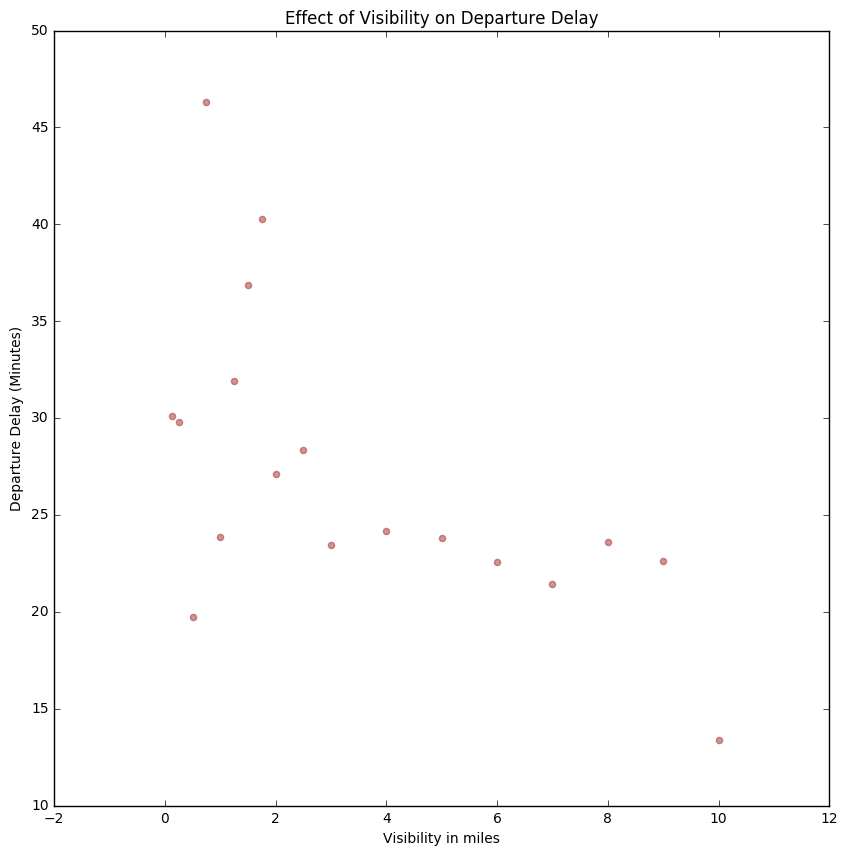

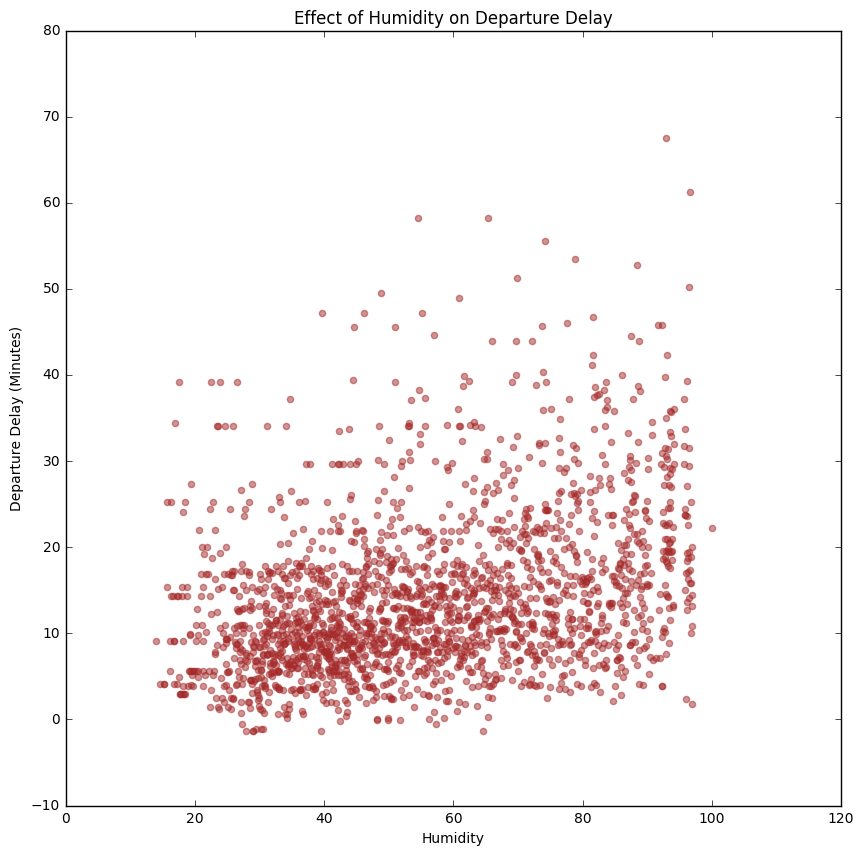

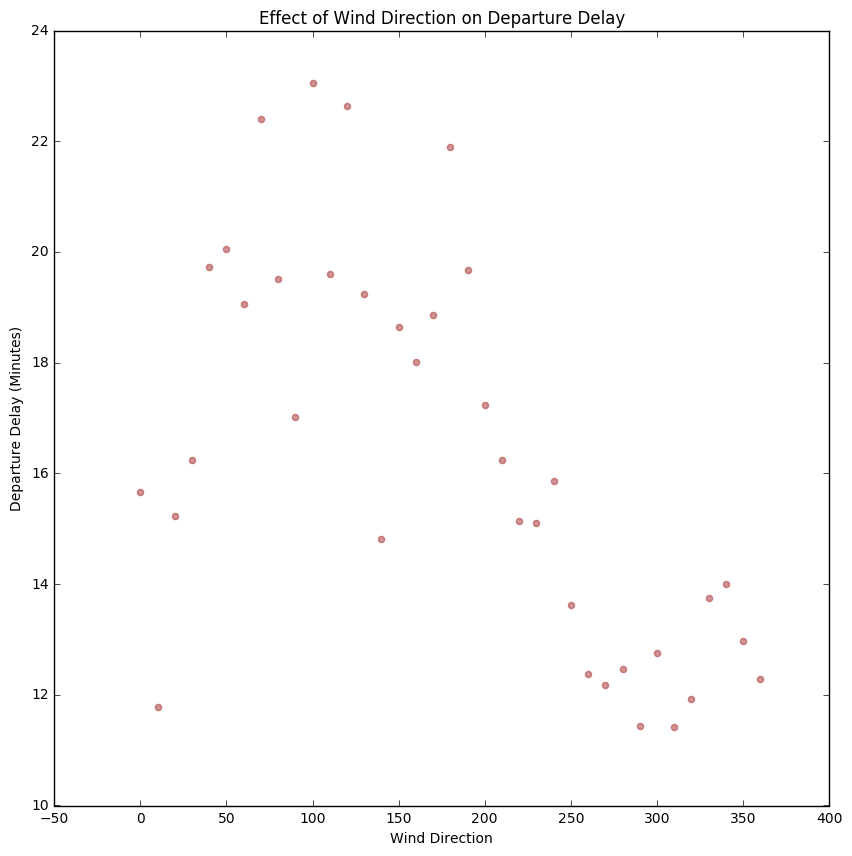

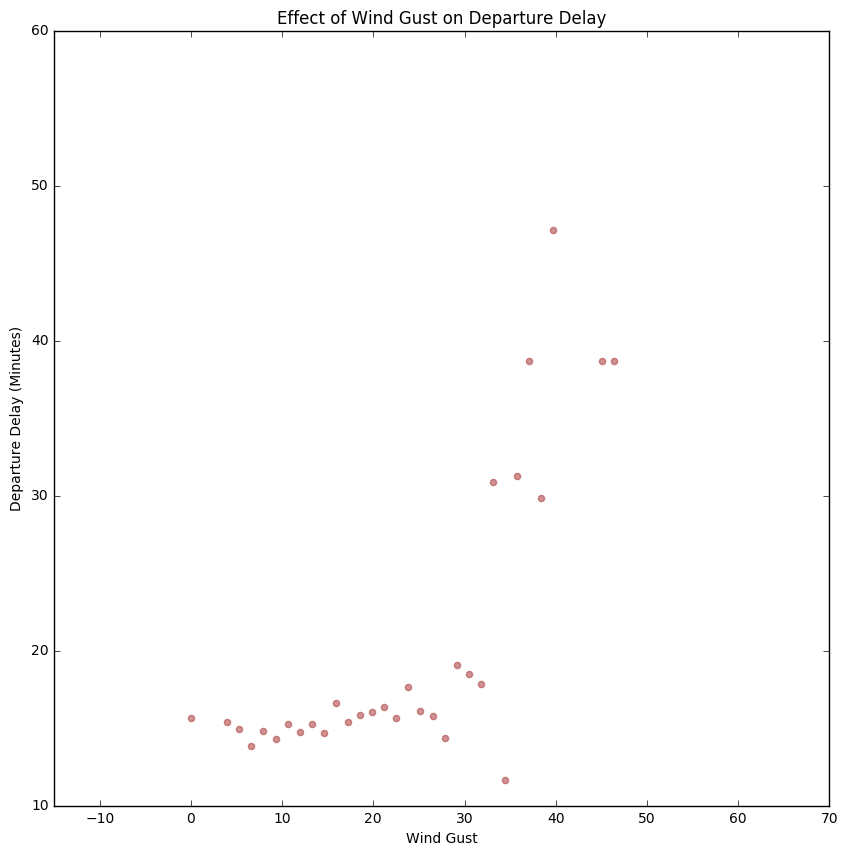

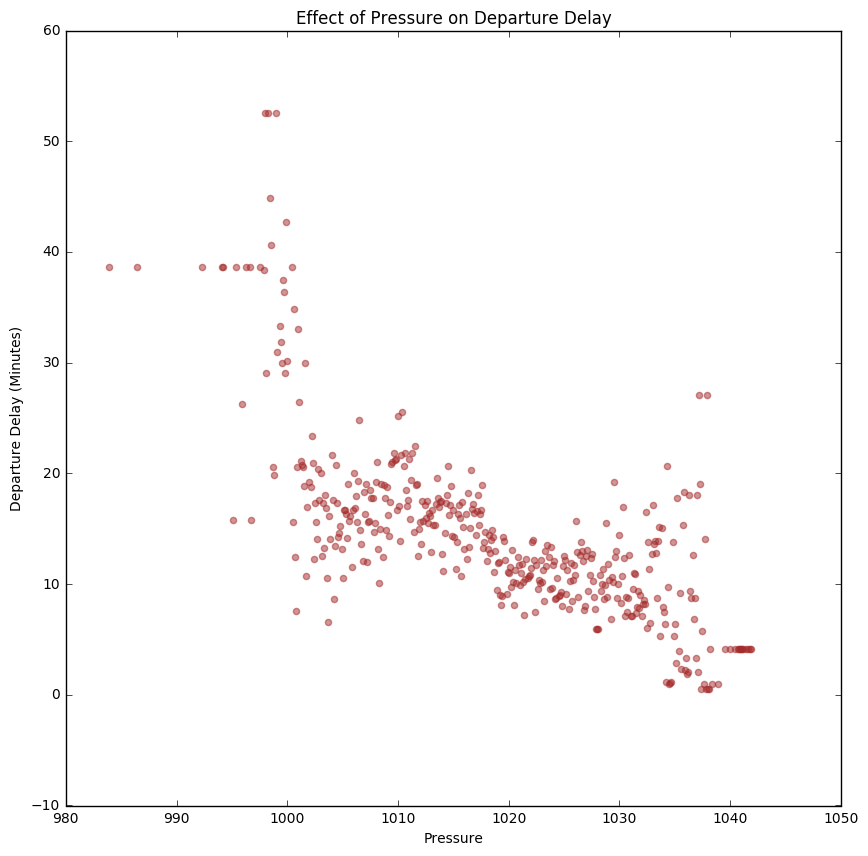

In [116]:
#Plots to see the efffect of individual naturl factor on average departure delay.
plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('precip')['dep_delay'].mean())
pt['precip'] = pt.index
plt.scatter(pt.precip, pt.dep_delay,color = "brown",alpha=0.5)
plt.xlabel("Precipitation")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Effect of Precipitation on Departure Delay")


plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('temp')['dep_delay'].mean())
pt['temp'] = pt.index
plt.scatter(pt.temp, pt.dep_delay,color = "brown",alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Effect of Temperature on Departure Delay")


plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('dewp')['dep_delay'].mean())
pt['dewp'] = pt.index
plt.scatter(pt.dewp, pt.dep_delay,color = "brown",alpha=0.5)
plt.xlabel("Dew")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Effect of Dew on Departure Delay")

plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('visib')['dep_delay'].mean())
pt['visib'] = pt.index
plt.scatter(pt.visib, pt.dep_delay,color = "brown",alpha=0.5)
plt.xlabel("Visibility in miles")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Effect of Visibility on Departure Delay")


plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('humid')['dep_delay'].mean())
pt['humid'] = pt.index
plt.scatter(pt.humid, pt.dep_delay,color = "brown",alpha=0.5)
plt.xlabel("Humidity")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Effect of Humidity on Departure Delay")


plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('wind_dir')['dep_delay'].mean())
pt['wind_dir'] = pt.index
plt.scatter(pt.wind_dir, pt.dep_delay,color = "brown",alpha=0.5)
plt.xlabel("Wind Direction")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Effect of Wind Direction on Departure Delay")


plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('wind_gust')['dep_delay'].mean())
pt['wind_gust'] = pt.index
plt.scatter(pt.wind_gust, pt.dep_delay,color = "brown",alpha=0.5)
axes = plt.gca()
axes.set_xlim([-15,70])
axes.set_ylim([10,60])
plt.xlabel("Wind Gust")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Effect of Wind Gust on Departure Delay")


plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('pressure')['dep_delay'].mean())
pt['pressure'] = pt.index
plt.scatter(pt.pressure, pt.dep_delay,color = "brown",alpha=0.5)
plt.xlabel("Pressure")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Effect of Pressure on Departure Delay")
plt.show()


plt.figure(figsize=[10,10])
pt=pd.DataFrame(merged.groupby('wind_speed')['dep_delay'].mean())
pt['wind_speed'] = pt.index
plt.scatter(pt.wind_speed, pt.dep_delay,color = "brown",alpha=0.5)
axes = plt.gca()
axes.set_xlim([-10,70])
axes.set_ylim([10,50])
plt.xlabel("Wind Speed")
plt.ylabel("Departure delay (Minutes)")
plt.title("Effect of Wind Speed on Departure Delay")


Based on the above plots, following is the effect of each natural factor on average departure delay:

1. Wind Speed: Increase in wind speed increases the average departure delay
2. Precipitation: Increase in precipitation increases the average departure delay to certain extent but not significantly.
3. Temperature: Based on the plot, there isn't any significant relationship between temperature variations on average departure delay.
4. Dew: Similarly, there is no significant relation between change in dew with average departure delay.
5. Visibility: Increase in visibility decreases the average departure delay.
6. Humidity: Increase in humidity increases the average departure delay to certain extent but not significantly.
7. Wind Direction: No trend is observed for average departure delay with respect to the wind direction.
8. Wind Gust: Average departure delay is increasing with increase in the wind gust.
9. Pressure: Increase in pressure shows decline in the average departure delay.